### Imports & Preparation

In [1]:
import sys
sys.path.insert(1, '../../')  # to load from any submodule in the repo

from utils import dpcr_generator

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import time

seed_file = open('../../utils/seed.txt', "r")
seed = int(seed_file.read())
seed_file.close()

print ("Using Seed:", seed)

np.random.seed(seed)

Using Seed: 34897567


In [2]:
TRAIN_SET_SIZE = 1000
TEST_SET_SIZE = int(0.1 * TRAIN_SET_SIZE)

OUTPUT_DIRECTORY = '../../data/train_test_data'
TRAIN_DATA_NAME = 'train_data_2D'
TEST_DATA_NAME = 'test_data_2D'

## Generate

In [3]:
start = time.time()

trainArr = dpcr_generator.getTrainingArray(TRAIN_SET_SIZE, resolution = 50, max_iter = 5, gamma = 1.2)

print ("Total Time: ", time.time() - start)

Total Time:  0.39487361907958984


In [4]:
start = time.time()

testArr = dpcr_generator.getTrainingArray(TEST_SET_SIZE, resolution = 50, max_iter = 5, gamma = 1.2)

print ("Total Time: ", time.time() - start)

Total Time:  0.042986392974853516


In [5]:
np.savez(OUTPUT_DIRECTORY + '/' + TRAIN_DATA_NAME, *trainArr)
np.savez(OUTPUT_DIRECTORY + '/' + TEST_DATA_NAME, *testArr)

## Load & Test Train Data

In [6]:
start = time.time()

npzfile = np.load(OUTPUT_DIRECTORY + '/' + TRAIN_DATA_NAME + '.npz')
train_list = [npzfile[key] for key in npzfile.files]

print ("Total Time: ", time.time() - start)

Total Time:  0.2739124298095703


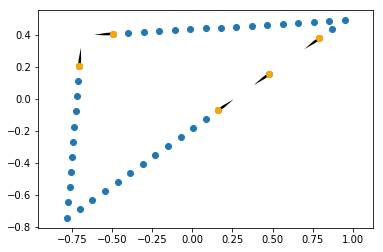

In [7]:
entry = train_list[np.random.randint(0, len(train_list))]

points = entry[:,0:2]
nearest_hidden = entry[:,2:4]
edge_mask = entry[:,4].astype(bool)

plt.axis('equal')

plt.scatter(
    points[:,0],
    points[:,1])

plt.quiver(
    points[edge_mask,0],
    points[edge_mask,1],
    nearest_hidden[edge_mask,0],
    nearest_hidden[edge_mask,1],
    color='black',
    headwidth = 1)

plt.scatter(
    points[edge_mask,0],
    points[edge_mask,1],
    color='orange')